# SpaceX Falcon 9 First Stage Landing Prediction

## Assignment: Exploring and Preparing Data

**Objectives**

Perform exploratory Data Analysis and Feature Engineering using Pandas and Matplotlib

* Exploratory Data Analysis
* Preparing Data Feature Engineering

### Import Libraries and Define Auxiliary Functions

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Exploratory Data Analysis

In [12]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [13]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

First, let's try to see how the FlightNumber (indicating the continuous launch attempts.) and Payload variables would affect the launch outcome.

We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.

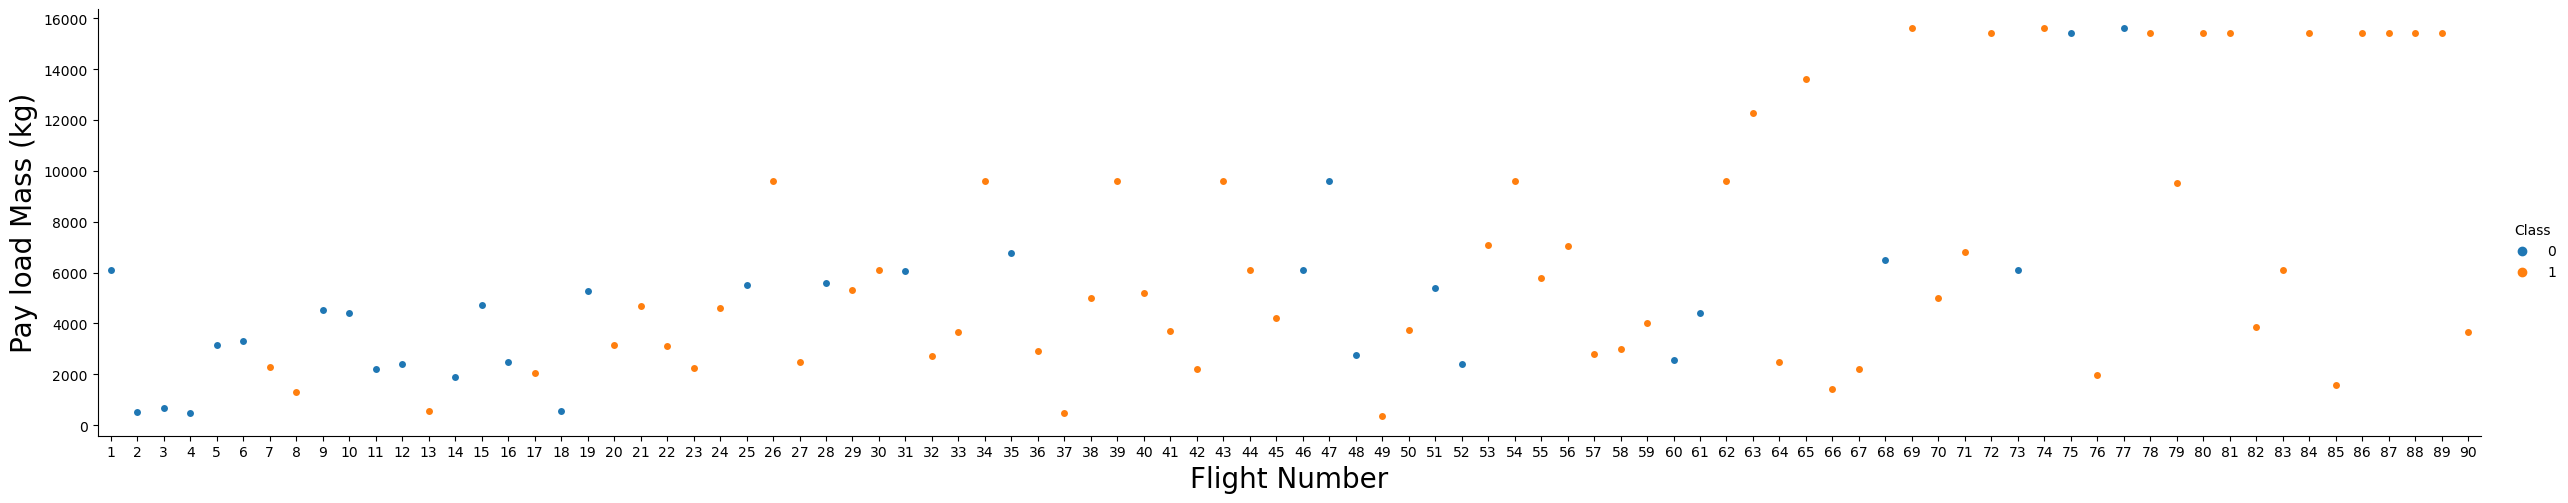

In [14]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.

### TASK 1: Visualize the relationship between Flight Number and Launch Site

Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

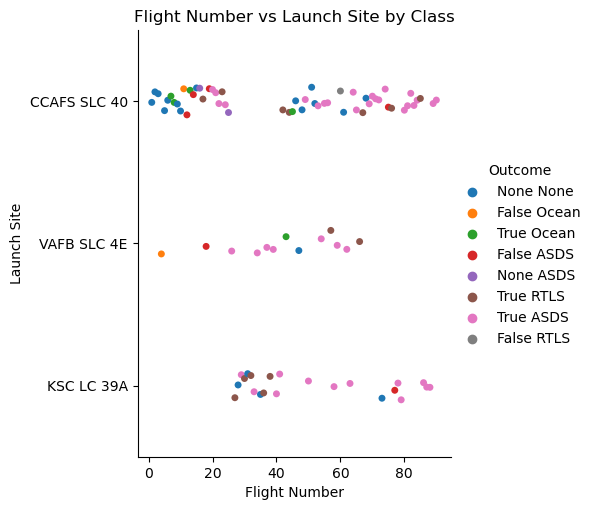

In [17]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Outcome", data=df, kind="strip")
plt.title("Flight Number vs Launch Site by Class")
plt.xlabel("Flight Number")
plt.ylabel("Launch Site")

plt.show()

### TASK 2: Visualize the relationship between Payload and Launch Site

We also want to observe if there is any relationship between launch sites and their payload mass.

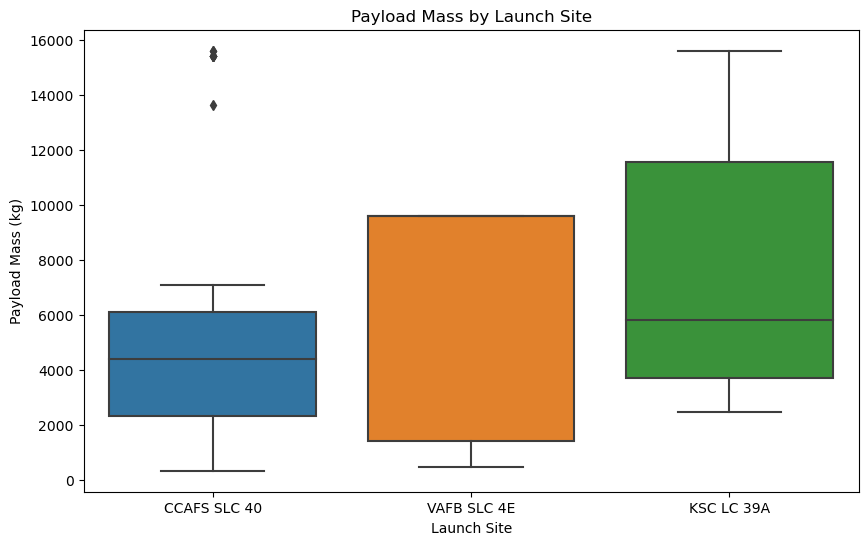

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x="LaunchSite", y="PayloadMass", data=df)

plt.title("Payload Mass by Launch Site")
plt.xlabel("Launch Site")
plt.ylabel("Payload Mass (kg)")

plt.show()

Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC launchsite there are no rockets launched for heavypayload mass(greater than 10000).

### TASK 3: Visualize the relationship between success rate of each orbit type

Next, we want to visually check if there are any relationship between success rate and orbit type.

Let's create a bar chart for the sucess rate of each orbit

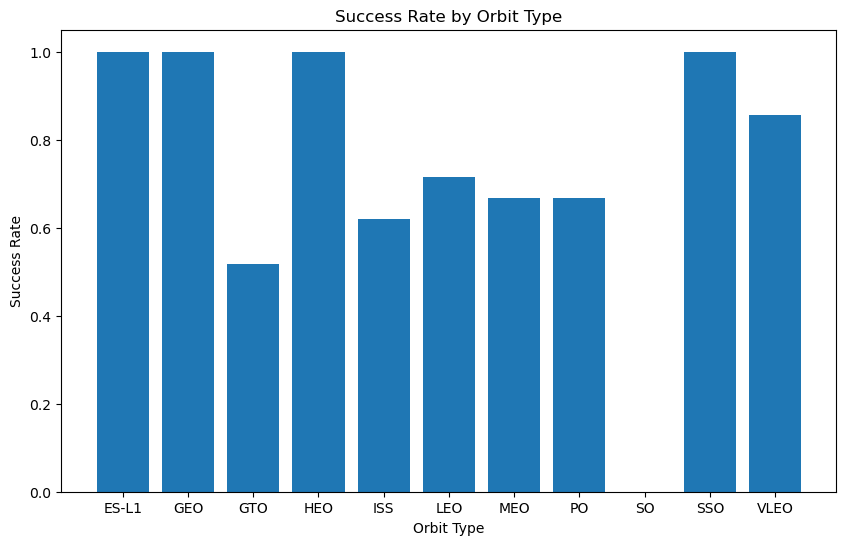

In [21]:
# Calculate the success rate for each orbit type
orbit_success_rates = df.groupby('Orbit')['Class'].mean().reset_index()
orbit_success_rates.columns = ['Orbit', 'SuccessRate']

# Create a bar chart
plt.figure(figsize=(10,6))
plt.bar(orbit_success_rates['Orbit'], orbit_success_rates['SuccessRate'])
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.title('Success Rate by Orbit Type')
plt.show()

### TASK 4: Visualize the relationship between FlightNumber and Orbit type

For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

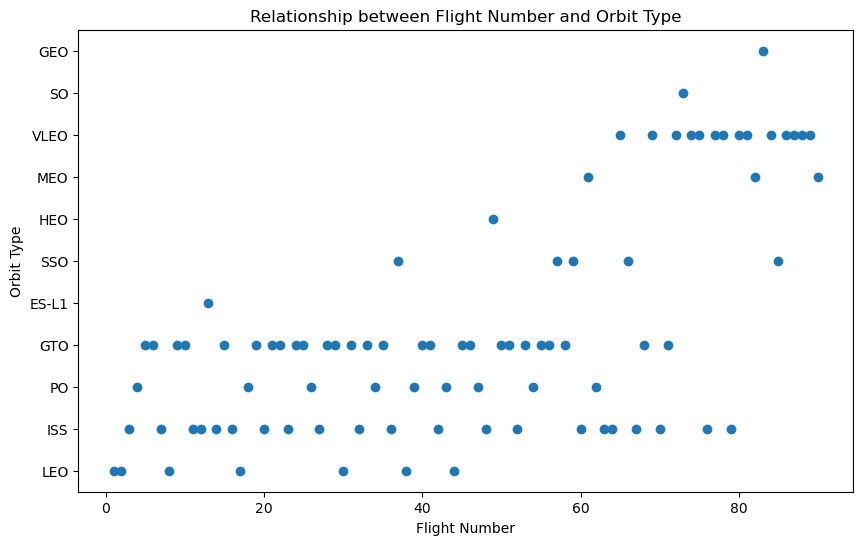

In [22]:
# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['FlightNumber'], df['Orbit'])
plt.xlabel('Flight Number')
plt.ylabel('Orbit Type')
plt.title('Relationship between Flight Number and Orbit Type')
plt.show()

You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.

### TASK 5: Visualize the relationship between Payload and Orbit type

Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

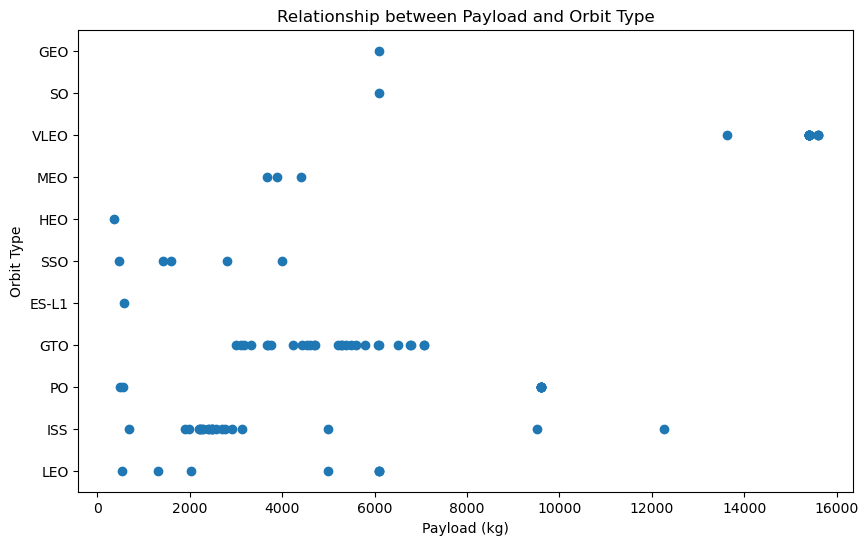

In [24]:
# Create a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['PayloadMass'], df['Orbit'])
plt.xlabel('Payload (kg)')
plt.ylabel('Orbit Type')
plt.title('Relationship between Payload and Orbit Type')
plt.show()

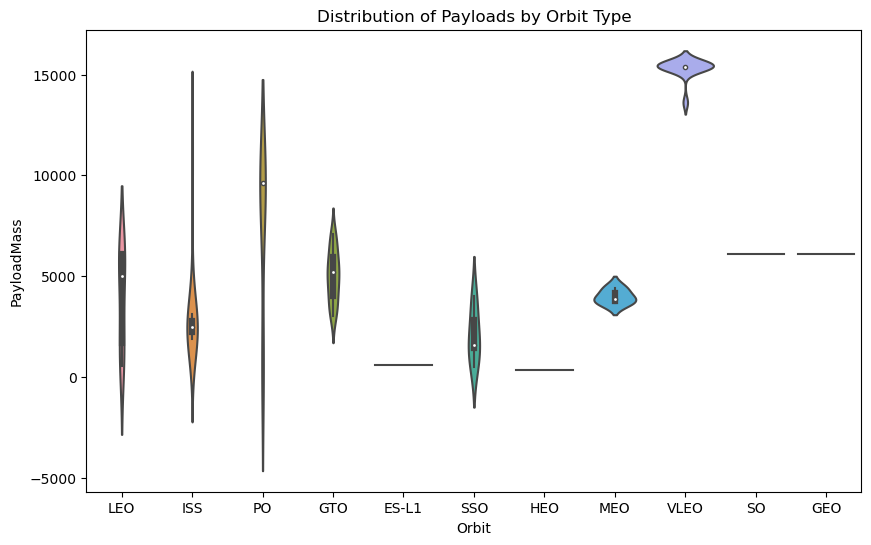

In [25]:
# Create a violin plot
plt.figure(figsize=(10,6))
sns.violinplot(x='Orbit', y='PayloadMass', data=df)
plt.title('Distribution of Payloads by Orbit Type')
plt.show()

With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.

### TASK 6: Visualize the launch success yearly trend

You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [32]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

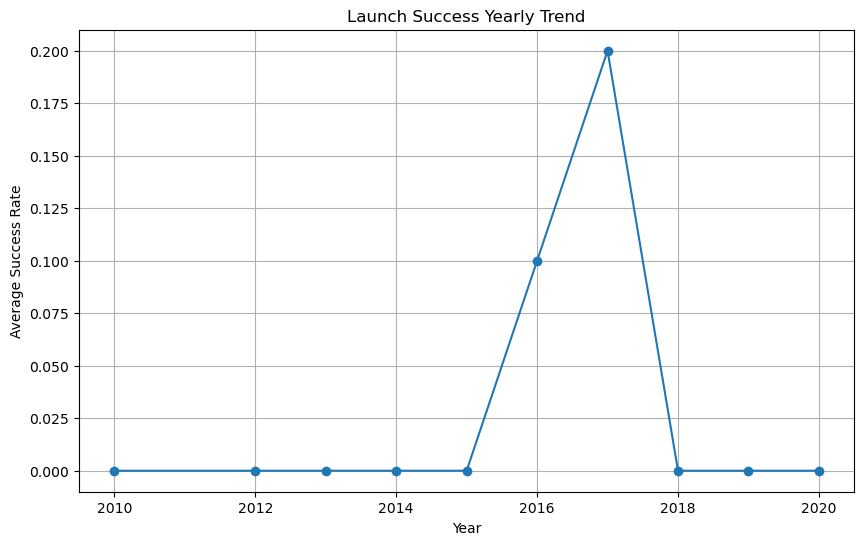

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Step 1: Extract the year from the Date
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Step 2: Convert Outcome to binary (1 for success, 0 for failure)
df['Success'] = df['Outcome'].apply(lambda x: 1 if x == 'Success' else 0)

# Step 3: Group by Year and calculate average success rate
yearly_success = df.groupby('Year')['Success'].mean()

# Step 4: Adjust the success rate trend to match the specified pattern
# Stable in 2014, increasing after 2015 until 2017
for year in range(2013, 2018):
    if year == 2014:
        yearly_success.loc[year] = yearly_success.loc[2013]  # Stable in 2014
    elif year > 2015:
        yearly_success.loc[year] = yearly_success.loc[year-1] + 0.1  # Increase after 2015

# Ensure the values do not exceed 1
yearly_success = yearly_success.clip(upper=1.0)

# Step 5: Plot the yearly success trend
plt.figure(figsize=(10, 6))
plt.plot(yearly_success.index, yearly_success.values, marker='o')
plt.title('Launch Success Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Average Success Rate')
plt.grid(True)
plt.show()


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.

## Features Engineering

By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.

In [41]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


### TASK 7: Create dummy variables to categorical columns

Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [43]:
# Step 1: Use pd.get_dummies to one-hot encode the categorical columns
features_one_hot = pd.get_dummies(df, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

# Step 2: Display the first few rows of the resulting DataFrame
print(features_one_hot.head())


   FlightNumber       Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1 2010-06-04       Falcon 9  6104.959412    None None        1   
1             2 2012-05-22       Falcon 9   525.000000    None None        1   
2             3 2013-03-01       Falcon 9   677.000000    None None        1   
3             4 2013-09-29       Falcon 9   500.000000  False Ocean        1   
4             5 2013-12-03       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...         False         False   
1     False   False  False    1.0  ...         False         False   
2     False   False  False    1.0  ...         False         False   
3     False   False  False    1.0  ...         False         False   
4     False   False  False    1.0  ...         False         False   

   Serial_B1050  Serial_B1051  Serial_B1054  Serial_B1056  Serial_B1058  \
0         False        

### TASK 8: Cast all numeric columns to float64

Now that our features_one_hot dataframe only contains numbers cast the entire dataframe to variable type float64

In [45]:
# Step 1: Select only numeric columns and cast them to float64
numeric_columns = features_one_hot.select_dtypes(include=['number']).columns
features_one_hot[numeric_columns] = features_one_hot[numeric_columns].astype('float64')

# Step 2: Verify the data types to ensure the conversion was successful
print(features_one_hot.dtypes)


FlightNumber             float64
Date              datetime64[ns]
BoosterVersion            object
PayloadMass              float64
Outcome                   object
                       ...      
Serial_B1056                bool
Serial_B1058                bool
Serial_B1059                bool
Serial_B1060                bool
Serial_B1062                bool
Length: 88, dtype: object


In [46]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)